# Deep Learning Fundamentals 9: Into the World of Tensorflow/Keras 3

In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Gradient Clipping

Another approach that we can use for dealing with Exploiding/Vanishing gradient problem is gradient clipping. I previously used this technique in one of my notebooks I guess, but this time I would like to also explain this topic. In this technique, we are basically clipping gradients during backpropagation and controlling that gradients do not exceed a threshold that we set. This technique can be preferable to use with RNNs since back normalization is likely to cause some problems.

In [2]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

The code above clips partial derivatives of the loss function (with respect to each trainable parameter) between -1 and 1. We can also tune this norm with hyperparameter tuning

Note that gradient clipping may cause the orientation of the gradient vector to change. To avoid this, one can use the clipnorm argument instead of the clipvalue argument.

In [3]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

Let's load Fashion MNIST to try out gradient clipping.

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal',activation='relu'))
for layer in range(50):
    model.add(keras.layers.Dense(100, kernel_initializer='lecun_normal',activation='relu')) # adding 50 hidden layers.
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-2,clipnorm=1),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 16s 10ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.0914
Epoch 2/10
1719/1719 [==============================] - 16s 9ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 6/10
1719/1719 [==============================] - 16s 9ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_a

### Some Notes:

1. A good article about Gradient Clipping: [link](https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48)

2. This is a very good paper about the problems of RNN that we can solve (partially) using gradient clipping. [On the difficulty of training Recurrent Neural Networks](https://arxiv.org/pdf/1211.5063.pdf)

# Learning Rate Scheduling

Now it is time to move to another subject. Finding a good learning rate is very important and there is a technique that we can use to set the learning rate which generally works better than a classical constant learning rate. This technique is called learning rate scheduling. In learning rate scheduling, we start with a large learning rate and gradually reduce it during training.


## 1. Power Scheduling

In power scheduling, we set the learning rate according to the function below. We have three hyperparameters $\eta_0$ is the initial learning rate, c (Keras assumes that c is equal to 1) is the power and s is steps. The rate will drop quickly in the first steps and then get slower and slower in later steps.

$$\eta \left(t\right)=\:\frac{\eta _0}{\left(1+\frac{t}{s}\right)^c}$$

In [6]:
optimizer = keras.optimizers.Adam(lr=0.01, decay=1e-4)# we can add power scheduling just by adding the **decay** parameter to optimizer

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal',activation='relu'))
for layer in range(50):
    model.add(keras.layers.Dense(100, kernel_initializer='lecun_normal',activation='relu')) # adding 50 hidden layers.
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 2.3042 - accuracy: 0.0965 - val_loss: 2.3044 - val_accuracy: 0.0986
Epoch 2/10
1719/1719 [==============================] - 16s 9ms/step - loss: 2.3037 - accuracy: 0.0999 - val_loss: 2.3025 - val_accuracy: 0.1008
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 2.3035 - accuracy: 0.1005 - val_loss: 2.3034 - val_accuracy: 0.0976
Epoch 4/10
1719/1719 [==============================] - 16s 9ms/step - loss: 2.3035 - accuracy: 0.1009 - val_loss: 2.3025 - val_accuracy: 0.0980
Epoch 5/10
1719/1719 [==============================] - 16s 9ms/step - loss: 2.3032 - accuracy: 0.1022 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 6/10
1719/1719 [==============================] - 16s 9ms/step - loss: 2.3033 - accuracy: 0.0996 - val_loss: 2.3036 - val_accuracy: 0.1002
Epoch 7/10
1719/1719 [==============================] - 16s 9ms/step - loss: 2.3034 - accuracy: 0.0988 - val_loss: 2.3038 - val_ac

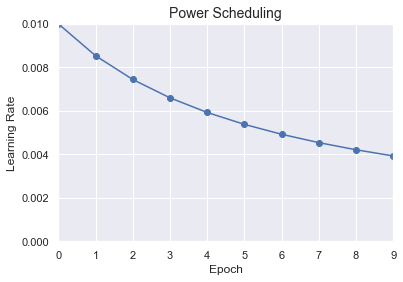

In [8]:
import math
import matplotlib.pyplot as plt
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(10)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, 10 - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## 2. Exponential Scheduling

The exponential will drop by a factor of 10 in s steps. Compared to power scheduling, it reduces to learning rate more sharply. 

$$\eta \left(t\right)=\:\eta _0\cdot 0.1^{\frac{t}{s}}$$

In [9]:
def exp_sch_callback(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal',activation='relu'))
for layer in range(50):
    model.add(keras.layers.Dense(100, kernel_initializer='lecun_normal',activation='relu')) # adding 50 hidden layers.
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-2),
              metrics=["accuracy"])

Unlike power scheduling, we need to write down our own function and pass it to a callback to use Exponential Scheduling.   `LearningRateScheduler` will update the learning rate at the beginning of each epoch.

In [11]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exp_sch_callback)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/10
1719/1719 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3030 - val_accuracy: 0.0914
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 7/10
1719/1719 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.0979 - val_loss: 2.3028 - val_ac

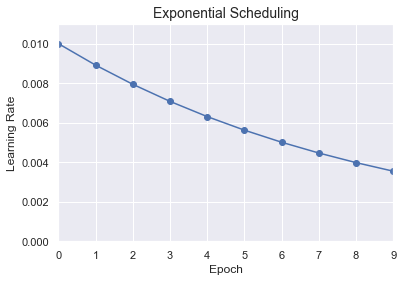

In [12]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, 10 - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## 3. Piecewise constant scheduling

In this approach, we use a constant learning rate for some number of epochs (0.1 for 5 epochs, 0.001 for another 10 etc..)

In [13]:
def piecewise_constant_sch(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal',activation='relu'))
for layer in range(50):
    model.add(keras.layers.Dense(100, kernel_initializer='lecun_normal',activation='relu')) # adding 50 hidden layers.
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-2),
              metrics=["accuracy"])

In [15]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_sch)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/10
1719/1719 [==============================] - 13s 8ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 3/10
1719/1719 [==============================] - 13s 7ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0914
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3029 - val_ac

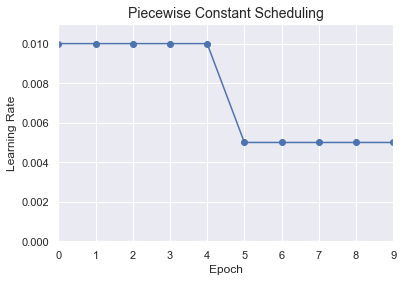

In [16]:
plt.plot(history.epoch, [piecewise_constant_sch(epoch) for epoch in history.epoch], "o-")
plt.axis([0, 10 - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## 4. Performance scheduling

In this approach, a validation error is measured every N steps and the learning rate is reduced by a factor of $\lambda$ when the error stops dropping significantly.

For performance scheduling, use the `ReduceLROnPlateau()` callback. For example, if you pass the following callback to the fit() method, it will multiply the learning rate by 0.5 whenever the best validation loss does not improve for five consecutive epochs (there are other options that we can use with this callback, check out the [documentation](https://keras.io/api/callbacks/reduce_lr_on_plateau/)):

In [17]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal',activation='relu'))
for layer in range(50):
    model.add(keras.layers.Dense(100, kernel_initializer='lecun_normal',activation='relu')) # adding 50 hidden layers.
model.add(keras.layers.Dense(10, activation="softmax"))


optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 2.3039 - accuracy: 0.0989 - val_loss: 2.3068 - val_accuracy: 0.0914
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 2.3042 - accuracy: 0.0991 - val_loss: 2.3036 - val_accuracy: 0.1024
Epoch 3/10
1719/1719 [==============================] - 19s 11ms/step - loss: 2.3042 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 2.3041 - accuracy: 0.0999 - val_loss: 2.3038 - val_accuracy: 0.0986
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3039 - accuracy: 0.1003 - val_loss: 2.3050 - val_accuracy: 0.1012
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3042 - accuracy: 0.1003 - val_loss: 2.3040 - val_accuracy: 0.0976
Epoch 7/10
1719/1719 [==============================] - 13s 7ms/step - loss: 2.3040 - accuracy: 0.0992 - val_loss: 2.3033 - val_

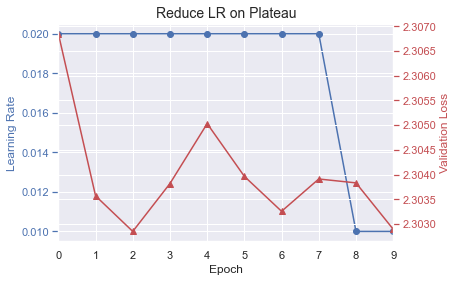

In [18]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, 10 - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

## 5. 1cycle scheduling:

1cycle  starts by increasing $\eta _0$, growing linear up to $\eta _1$ halfway through training. Then in the second half, it decreases the learning rate linearly down to $\eta_0$

In practice power sceduling and exponential scheduling work well and the 1cycle approach seems to perform even better. 

I recommend reading this article about Learning Rate Scheduling: [AN EMPIRICAL STUDY OF LEARNING RATES IN DEEP NEURAL NETWORKS FOR
SPEECH RECOGNITION](https://static.googleusercontent.com/media/research.google.com/tr//pubs/archive/40808.pdf)

In [19]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        keras.backend.set_value(self.model.optimizer.lr, rate)

In [20]:
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * 10, max_rate=0.05)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal',activation='relu'))
for layer in range(50):
    model.add(keras.layers.Dense(100, kernel_initializer='lecun_normal',activation='relu')) # adding 50 hidden layers.
model.add(keras.layers.Dense(10, activation="softmax"))


optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),batch_size=128,
                    callbacks=[onecycle])

Epoch 1/10
430/430 [==============================] - 6s 15ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.0976
Epoch 2/10
430/430 [==============================] - 6s 13ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3033 - val_accuracy: 0.0914
Epoch 3/10
430/430 [==============================] - 6s 13ms/step - loss: 2.3029 - accuracy: 0.0963 - val_loss: 2.3033 - val_accuracy: 0.0914
Epoch 4/10
430/430 [==============================] - 6s 14ms/step - loss: 2.3029 - accuracy: 0.0975 - val_loss: 2.3033 - val_accuracy: 0.1024
Epoch 5/10
430/430 [==============================] - 6s 13ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3025 - val_accuracy: 0.1012
Epoch 6/10
430/430 [==============================] - 6s 14ms/step - loss: 2.3030 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.1024
Epoch 7/10
430/430 [==============================] - 9s 20ms/step - loss: 2.3029 - accuracy: 0.1007 - val_loss: 2.3039 - val_accuracy: 0.0986

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class. We can do that by writing our own callback class or we can use `keras.optimizers.schedules`. I prefer not to write my own callback here for scheduling the learning rate at each iteration, rather I will use `keras.optimizers.schedules` since it is an easier way of using scheduling at each iteration.

In [21]:
s = 10 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, kernel_initializer='lecun_normal',activation='relu'))
for layer in range(50):
    model.add(keras.layers.Dense(100, kernel_initializer='lecun_normal',activation='relu')) # adding 50 hidden layers.
model.add(keras.layers.Dense(10, activation="softmax"))


optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0914
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 2.3026 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 5/10
1719/1719 [==============================] - 13s 7ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3028 - val_ac

You can find more about schedules in this [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) also check out this Medium article [Learning Rate Schedules and Adaptive Learning Rate Methods for Deep Learning](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)

## Reusing Pretrained Layers

Instead of training a large DNN from scratch, we can find an existing neural network that does a similar job to the one we are trying to do and reuse the layers of this neural network. This technique is called transfer learning.

* If the input pictures of your new task don’t have the same size as the ones used in the original task, you will usually have to add a preprocessing step to resize them to the size expected by the original model. More generally, transfer learning will work best when the inputs have similar low-level features. - [Géron, A. (2019)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).


Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using  `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer information much more efficiently, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [22]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [23]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [24]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [25]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

In [27]:
model_A.save("my_model_A.h5")

In [28]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [29]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

In [31]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

Training model B on model A will also affect model A. To avoid this, we can clone model A before reusing its layers.

In [32]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

Now It's time to freeze all the reused layers (so that they will not be modified), then we will train our model and see how it will perform. Additionally, we will try unfreezing one or two of the top hidden layers to let backpropagation tune them to see if we can improve the performance even further. 

* The more training data you have, the more layers you can unfreeze. It is also useful to reduce the learning rate when you unfreeze reused layers: this will avoid wrecking their fine-tuned weights. - [Géron, A. (2019)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

In [33]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

* Now you could train model_B_on_A for task B, but since the new output layer was initialized randomly it will make large errors (at least during the first few epochs), so there will be large error gradients that may wreck the reused weights. To avoid this, one approach is to freeze the reused layers during the first few epochs, giving the new layer some time to learn reasonable weights. To do this, set every layer’s trainable attribute to False and compile the model: You must always compile your model after you freeze or unfreeze layers. - [Géron, A. (2019)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Let's see how the model performs.

In [35]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.9760


[0.11059117317199707, 0.9760000109672546]

In [36]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9855


[0.0633784681558609, 0.9854999780654907]

It looks like transfer learning didn't improve the model much. Well, this is because that transfer learning does not work very well with small dense networks since they learn just a few patterns. It is also the same for dense networks, they are unlikely to be useful in other tasks since they learn very specific patterns. However, we will see that transfer learning works very well with CNN.

Lastly, while talking about transfer learning I think we should briefly talk about two different pretraining processes.
1. **Unsupervised Pretraining:** In a situation in which you don't have much-labeled data and you cannot afford to label them, you can first use unsupervised learning(such as with an autoencoder or GAN), and then you can use lower layers of these unsupervised algorithms (lower layers of GAN's discriminator), add the output layer for your task on top, and then use supervised learning to fine-tune your model. Before the time that the vanishing gradient problem is solved, this technique was used widely with Boltzmann Machines but today it is generally used with GANs or autoencoders.

* Note that in the early days of Deep Learning it was difficult to train deep models, so people would use a technique called greedy layer-wise pretraining. They would first train an unsupervised model with a single layer, typically an RBM, then they would freeze that layer and add another one on top of it, then train the model again (effectively just training the new layer), then freeze the new layer and add another layer on top of it, train the model again, and so on. Nowadays, things are much simpler: people generally train the full unsupervised model in one shot and use autoencoders or GANs rather than RBMs. - [Géron, A. (2019)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

2. **Pretraining on Auxilary Task:** Another option that we can use if we do not have enough labeled training data is pretraining on an auxiliary task. In this option, we first train our model on an auxiliary task (must be a task that we can easily obtain labeled data) and then we will reuse the lower layers of this neural network for the actual task. The reason we are only using the lower layers is that these layers learn feature detectors that we can also use for the second neural network, whereas the higher layers learn more specific things related to the first problem. 

Two good examples from [Géron, A. (2019)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/):

* For example, if you want to build a system to recognize faces, you may only have a few pictures of each individual—clearly not enough to train a good classifier. Gathering hundreds of pictures of each person would not be practical. You could, however, gather a lot of pictures of random people on the web and train a first neural network to detect whether or not two different pictures feature the same person. Such a network would learn good feature detectors for faces, so reusing its lower layer would allow you to train a good face classifier that uses little training data.


* For natural language processing (NLP) applications, you can download a corpus of millions of text documents and automatically generate labeled data from it. For example, you could randomly mask out some words and train a model to predict what the missing words are (e.g., it should predict that the missing word in the sentence “What ___ you saying?” is probably “are” or “were”). If you can train a model to reach good performance on this task, then it will already know quite a lot about language, and you can certainly reuse it for your actual task and fine-tune it on your labeled data.